# Ejemplo 7: NLTK Distribución de frecuencia

__Objetivos__

- Aprender a usar el objeto FreqDist de la librería NLTK

__Desarrollo__
Ahora vamos a explorar el objeto FreqDist que nos facilita el conteo de frecuencias de las palabras en nuestro conjunto de datos. La primera parte del procesamiento es idéntico a la vez pasada.

---

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json('../../datasets/new_york_times_bestsellers-clean.json')
df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [3]:
grouped_by_title = df.groupby('title')['description'].max()
grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [16]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '', regex=True)
grouped_by_title = grouped_by_title.str.replace('\d', '', regex=True)
grouped_by_title = grouped_by_title.str.replace('\\n', '', regex=True)
grouped_by_title = grouped_by_title.dropna()

grouped_by_title

title
10TH ANNIVERSARY            detective lindsay boxer and the womens murder ...
11TH HOUR                   detective lindsay boxer and the womens murder ...
1225 CHRISTMAS TREE LANE    puppies and an exhusband loom large in the las...
1356                        in the fourth book of the grail quest series t...
1Q84                        in s tokyo a woman who punishes perpetrators o...
                                                  ...                        
Z                           a novel based on the lives of zelda and f scot...
ZERO DAY                        a military investigator uncovers a conspiracy
ZERO HISTORY                several characters from spook country return t...
ZONE ONE                        fighting zombies in postapocalyptic manhattan
ZOO                         a young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [17]:
# Tokenización por palabras
tokenized = grouped_by_title.apply(nltk.word_tokenize)
tokenized

title
10TH ANNIVERSARY            [detective, lindsay, boxer, and, the, womens, ...
11TH HOUR                   [detective, lindsay, boxer, and, the, womens, ...
1225 CHRISTMAS TREE LANE    [puppies, and, an, exhusband, loom, large, in,...
1356                        [in, the, fourth, book, of, the, grail, quest,...
1Q84                        [in, s, tokyo, a, woman, who, punishes, perpet...
                                                  ...                        
Z                           [a, novel, based, on, the, lives, of, zelda, a...
ZERO DAY                    [a, military, investigator, uncovers, a, consp...
ZERO HISTORY                [several, characters, from, spook, country, re...
ZONE ONE                    [fighting, zombies, in, postapocalyptic, manha...
ZOO                         [a, young, biologist, warns, world, leaders, a...
Name: description, Length: 754, dtype: object

In [18]:
all_words = tokenized.sum()

`nltk.FreqDist()`: se utiliza una distribución de frecuencia para registrar la frecuencia de cada tipo de palabra en un documento.

[Referencia](https://tedboy.github.io/nlps/generated/generated/nltk.FreqDist.html?highlight=freqdist)

In [19]:
# Utilizar FreqDist para analizar la distribución de frecuencia de las palabras
freq_dist = nltk.FreqDist(all_words)
print(freq_dist)

<FreqDist with 3161 samples and 12569 outcomes>


In [20]:
freq_dist.most_common(50)

[('a', 917),
 ('the', 778),
 ('of', 417),
 ('in', 364),
 ('to', 283),
 ('and', 280),
 ('an', 149),
 ('her', 137),
 ('is', 127),
 ('his', 123),
 ('who', 107),
 ('for', 102),
 ('with', 93),
 ('on', 71),
 ('from', 70),
 ('by', 68),
 ('series', 61),
 ('new', 61),
 ('woman', 60),
 ('that', 60),
 ('book', 57),
 ('detective', 52),
 ('murder', 51),
 ('novel', 49),
 ('when', 46),
 ('as', 42),
 ('killer', 41),
 ('at', 40),
 ('must', 39),
 ('has', 38),
 ('investigates', 38),
 ('young', 35),
 ('man', 35),
 ('life', 32),
 ('former', 32),
 ('she', 31),
 ('about', 30),
 ('their', 29),
 ('are', 28),
 ('war', 27),
 ('after', 27),
 ('family', 26),
 ('york', 26),
 ('two', 25),
 ('death', 25),
 ('world', 24),
 ('this', 24),
 ('agent', 24),
 ('into', 23),
 ('he', 23)]

Eliminar palabras vacías

````
nltk.download('stopwords')
````

In [21]:
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [22]:
freq_dist_no_stop_words.most_common(50)

[('series', 61),
 ('new', 61),
 ('woman', 60),
 ('book', 57),
 ('detective', 52),
 ('murder', 51),
 ('novel', 49),
 ('killer', 41),
 ('must', 39),
 ('investigates', 38),
 ('young', 35),
 ('man', 35),
 ('life', 32),
 ('former', 32),
 ('war', 27),
 ('family', 26),
 ('york', 26),
 ('two', 25),
 ('death', 25),
 ('world', 24),
 ('agent', 24),
 ('cia', 22),
 ('love', 22),
 ('secret', 21),
 ('discovers', 21),
 ('lawyer', 20),
 ('murdered', 20),
 ('finds', 20),
 ('eve', 19),
 ('th', 19),
 ('mother', 19),
 ('case', 19),
 ('women', 19),
 ('wife', 19),
 ('serial', 18),
 ('first', 18),
 ('secrets', 18),
 ('pursues', 18),
 ('investigator', 18),
 ('operative', 18),
 ('missing', 17),
 ('search', 17),
 ('searches', 17),
 ('help', 17),
 ('fbi', 17),
 ('stone', 17),
 ('years', 17),
 ('girl', 17),
 ('investigate', 16),
 ('one', 16)]

In [23]:
# Conteo de una palabra y porcentaje de aparición
print(f'{(100 * freq_dist_no_stop_words["woman"] / len(all_words_except_stop_words)):.3f}%')

0.786%


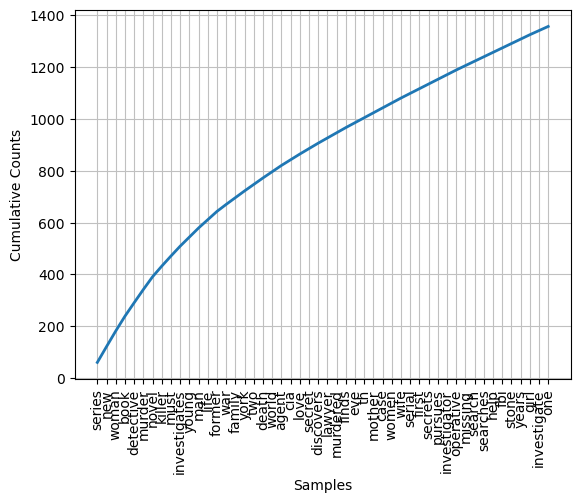

In [24]:
# Veamos qué proporción del text está siendo ocupada por las 50 palabras más comunes
freq_dist_no_stop_words.plot(50, cumulative=True);

In [25]:
# Palabras que sólo aparecen una sola vez
freq_dist_no_stop_words.hapaxes()[:20]

['puppies',
 'loom',
 'last',
 'grail',
 'poitiers',
 'tokyo',
 'punishes',
 'domestic',
 'aspiring',
 'resent',
 'draining',
 'weakening',
 'economy',
 'earthquake',
 'tests',
 'countrys',
 'jewish',
 'mishandling',
 'pregnant',
 'shows']

In [26]:
# Palabras largas

unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))

unique_series

0       understanding
1            civilian
2           screwball
3           robberies
4          government
            ...      
3060        intersect
3061          changes
3062           seeker
3063           heroes
3064             life
Length: 3065, dtype: object

In [27]:
unique_series[unique_series.str.len() > 15]

285      multigenerational
346      suicidebyaccident
771       counterterrorism
1212    turnofthethcentury
1273      mountainclimbing
1415      singersongwriter
1862      publicityseeking
2479      dissatisfactions
2787      postthanksgiving
3050      autobiographical
dtype: object

In [29]:
# Palabras largas que son frecuentes
larger_than_10 = unique_series.str.len() > 10
is_frequent = unique_series.apply(lambda x: freq_dist_no_stop_words[x] > 7)

unique_series[larger_than_10 & is_frequent]

28           terrorist
31           manhattan
230          daughters
275        investigate
367           searches
379         washington
390           american
472           assassin
641          character
831         characters
883         barrington
1084         discovers
1175     disappearance
1531        paranormal
1626          murdered
1661          together
1732         dangerous
1852          forensic
1904    pseudonymously
1953     investigation
2056          reporter
2132      investigates
2135      investigator
2168          carolina
2495         operative
2578          daughter
2686          involved
2822          intrigue
2925        mysterious
3027         detective
dtype: object

In [30]:
# Podemos contar otras cosas, como la frecuencia de longitudes de nuestras palabras
freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])

In [31]:
freq_dist_lengths.most_common()

[(5, 1382),
 (6, 1364),
 (7, 1212),
 (4, 1051),
 (8, 707),
 (9, 586),
 (3, 471),
 (10, 354),
 (11, 164),
 (12, 157),
 (2, 60),
 (13, 60),
 (14, 30),
 (16, 11),
 (15, 11),
 (1, 8),
 (17, 2),
 (18, 1)]

In [32]:
freq_dist_lengths.max()

5

In [33]:
freq_dist_lengths[5]

1382

In [34]:
# qué proporción del total de palabras tiene longitud de 5
freq_dist_lengths.freq(5)

0.18110339405058315